# Exploratory Data Analaysis

### ⬇️ Step 1: Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path
from ipywidgets import interact
import ipywidgets as widgets

from scipy.stats import mannwhitneyu
import statsmodels.api as sm
from scipy.stats import ttest_ind, false_discovery_control

# Visualization parameters
%matplotlib inline
a4_dims = (9.7, 3.27)
plt.rcParams['figure.figsize'] = (7, 5)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 500
plt.rcParams["figure.autolayout"] = True
sns.set_theme()

### 🍱 Step 2: Load Development Data

In [26]:
data = Path(os.path.join("../", "data", "interim"))
figures = Path(os.path.join("../", "reports", "figures"))

baseline_c_stop_go = pd.read_csv(data/"dev_baseline_c_stop_go.csv")
baseline_i_stop_go = pd.read_csv(data/"dev_baseline_i_stop_go.csv")
followup_c_stop_go = pd.read_csv(data/"dev_followup_c_stop_go.csv")
followup_i_stop_go = pd.read_csv(data/"dev_followup_i_stop_go.csv")

dataframes = [baseline_c_stop_go, baseline_i_stop_go, followup_c_stop_go, followup_i_stop_go]

In [17]:
baseline_c_stop_go.head(5)

src_subject_id              eventname  tfsstabwdp_149  tfsstabwdp_150  \
0  NDAR_INV00CY2MDM  baseline_year_1_arm_1       -0.072277        0.147229   
1  NDAR_INV00HEV6HB  baseline_year_1_arm_1       -0.557458       -0.126797   
2  NDAR_INV00U4FTRU  baseline_year_1_arm_1        0.161269       -0.371111   
3  NDAR_INV00X2TBWJ  baseline_year_1_arm_1        0.032588        0.270389   
4  NDAR_INV010ZM3H9  baseline_year_1_arm_1       -2.946458       -1.448809   

   tfsstabwdp_151  tfsstabwdp_152  tfsstabwdp_153  tfsstabwdp_154  \
0        0.122712        0.019083        0.259733        0.001988   
1       -0.166221        0.008992       -0.089459        0.156079   
2       -0.111674       -0.034581        0.160800        0.180306   
3       -0.188393        0.166681        0.422957        0.122249   
4        1.205950        0.333213       -5.486657       -0.247205   

   tfsstabwdp_155  tfsstabwdp_156  ...  race_ethnicity  \
0        0.025479        0.084555  ...             1.0   
1       -0.171020       -0.081916  ...             2.0   
2       -0.031762       -0.043941  ...             5.0   
3        0.181219        0.045643  ...             3.0   
4        0.756608       -0.225100  ...             1.0   

   acs_raked_propensity_score  site_id_l  rel_family_id  rel_birth_id  \
0                 1433.061575     site20         5355.0       53551.0   
1                  650.876929     site12         2257.0       22571.0   
2                 1778.916737     site04         2464.0       24641.0   
3                  907.279771     site14         3692.0       36921.0   
4                  550.058750     site12         1862.0       18621.0   

   school_id  district_id  interview_date  interview_age  visit_type  
0        NaN          NaN      08/22/2017          130.0         1.0  
1        NaN          NaN      07/08/2017          124.0         1.0  
2        NaN       6815.0      05/19/2018          130.0         1.0  
3        NaN      13889.0      05/12/2017          130.0         1.0  
4        NaN      14043.0      05/05/2018          112.0         1.0  

[5 rows x 432 columns]

In [18]:
baseline_c_stop_go.describe()

tfsstabwdp_149  tfsstabwdp_150  tfsstabwdp_151  tfsstabwdp_152  \
count     5628.000000     5628.000000     5628.000000     5628.000000   
mean         0.025624        0.118783        0.040855        0.020925   
std          0.477003        0.288759        0.194974        0.177476   
min         -6.080121       -2.771205       -2.201604       -1.896277   
25%         -0.121903       -0.005224       -0.047382       -0.071849   
50%          0.034661        0.124942        0.036226        0.019392   
75%          0.185506        0.254777        0.129511        0.108148   
max         10.551288        2.846353        2.788815        1.871865   

       tfsstabwdp_153  tfsstabwdp_154  tfsstabwdp_155  tfsstabwdp_156  \
count     5628.000000     5628.000000     5628.000000     5628.000000   
mean        -0.018518        0.014001        0.071658        0.040955   
std          0.546019        0.178354        0.161153        0.144554   
min         -7.862473       -1.469233       -1.321181       -1.041575   
25%         -0.157340       -0.078603       -0.008209       -0.032534   
50%         -0.006831        0.017634        0.076644        0.042299   
75%          0.142651        0.106344        0.156061        0.116263   
max         14.485385        1.947563        1.517212        1.103651   

       tfsstabwdp_157  tfsstabwdp_158  ...  demo_nat_lang_3_yrs_eng_p___5  \
count     5628.000000     5628.000000  ...                            0.0   
mean         0.017780       -0.008782  ...                            NaN   
std          0.175743        0.329979  ...                            NaN   
min         -2.000643       -2.710746  ...                            NaN   
25%         -0.077093       -0.181135  ...                            NaN   
50%          0.020507       -0.015555  ...                            NaN   
75%          0.117359        0.161709  ...                            NaN   
max          1.368988        2.890029  ...                            NaN   

       demo_nat_lang_3_yrs_eng_p___6  race_ethnicity  \
count                            0.0     5628.000000   
mean                             NaN        1.950959   
std                              NaN        1.319460   
min                              NaN        1.000000   
25%                              NaN        1.000000   
50%                              NaN        1.000000   
75%                              NaN        3.000000   
max                              NaN        5.000000   

       acs_raked_propensity_score  rel_family_id   rel_birth_id  \
count                 5628.000000    5628.000000    5628.000000   
mean                   688.209426    5758.556148   57586.639659   
std                    347.294565    3485.089271   34850.872489   
min                    161.361068       3.000000      31.000000   
25%                    450.973947    2696.750000   26968.500000   
50%                    615.414854    5534.500000   55346.000000   
75%                    818.942953    8836.500000   88366.000000   
max                   1778.916737   11880.000000  118801.000000   

           school_id   district_id  interview_age  visit_type  
count    1744.000000   3169.000000    5628.000000      5628.0  
mean    62877.426032   8290.456926     118.902630         1.0  
std     34563.830540   5129.541752       7.421704         0.0  
min         0.000000    124.000000     107.000000         1.0  
25%     34912.000000   4380.000000     112.000000         1.0  
50%     65201.000000   7619.000000     119.000000         1.0  
75%     91674.000000  12259.000000     125.000000         1.0  
max    124308.000000  18543.000000     132.000000         1.0  

[8 rows x 428 columns]

In [19]:
baseline_i_stop_go.describe()

tfsstabwdp_297  tfsstabwdp_298  tfsstabwdp_299  tfsstabwdp_300  \
count     5628.000000     5628.000000     5628.000000     5628.000000   
mean         0.045926        0.111905        0.043087        0.032442   
std          0.531718        0.315723        0.206559        0.179486   
min         -7.341149       -2.780593       -1.347577       -1.423459   
25%         -0.119501       -0.032745       -0.066536       -0.065982   
50%          0.040298        0.104335        0.028636        0.024447   
75%          0.202716        0.245546        0.135891        0.121926   
max          8.227169        6.675277        1.817943        1.602455   

       tfsstabwdp_301  tfsstabwdp_302  tfsstabwdp_303  tfsstabwdp_304  \
count     5628.000000     5628.000000     5628.000000     5628.000000   
mean        -0.002723        0.012893        0.092413        0.045071   
std          0.592961        0.187826        0.166944        0.153134   
min        -10.988120       -1.691683       -1.593916       -1.977198   
25%         -0.169217       -0.090269        0.003280       -0.038211   
50%         -0.003612        0.011392        0.089513        0.037882   
75%          0.164593        0.115233        0.182587        0.122677   
max         13.109429        1.462663        1.392086        0.910252   

       tfsstabwdp_305  tfsstabwdp_306  ...  demo_nat_lang_3_yrs_eng_p___5  \
count     5628.000000     5628.000000  ...                            0.0   
mean         0.033060       -0.036323  ...                            NaN   
std          0.173692        0.341005  ...                            NaN   
min         -1.035180       -1.948303  ...                            NaN   
25%         -0.068054       -0.228396  ...                            NaN   
50%          0.030003       -0.042441  ...                            NaN   
75%          0.132920        0.150444  ...                            NaN   
max          0.995510        2.748879  ...                            NaN   

       demo_nat_lang_3_yrs_eng_p___6  race_ethnicity  \
count                            0.0     5628.000000   
mean                             NaN        1.950959   
std                              NaN        1.319460   
min                              NaN        1.000000   
25%                              NaN        1.000000   
50%                              NaN        1.000000   
75%                              NaN        3.000000   
max                              NaN        5.000000   

       acs_raked_propensity_score  rel_family_id   rel_birth_id  \
count                 5628.000000    5628.000000    5628.000000   
mean                   688.209426    5758.556148   57586.639659   
std                    347.294565    3485.089271   34850.872489   
min                    161.361068       3.000000      31.000000   
25%                    450.973947    2696.750000   26968.500000   
50%                    615.414854    5534.500000   55346.000000   
75%                    818.942953    8836.500000   88366.000000   
max                   1778.916737   11880.000000  118801.000000   

           school_id   district_id  interview_age  visit_type  
count    1744.000000   3169.000000    5628.000000      5628.0  
mean    62877.426032   8290.456926     118.902630         1.0  
std     34563.830540   5129.541752       7.421704         0.0  
min         0.000000    124.000000     107.000000         1.0  
25%     34912.000000   4380.000000     112.000000         1.0  
50%     65201.000000   7619.000000     119.000000         1.0  
75%     91674.000000  12259.000000     125.000000         1.0  
max    124308.000000  18543.000000     132.000000         1.0  

[8 rows x 428 columns]

In [20]:
followup_c_stop_go.describe()

tfsstabwdp_149  tfsstabwdp_150  tfsstabwdp_151  tfsstabwdp_152  \
count     5628.000000     5628.000000     5628.000000     5628.000000   
mean         0.034720        0.127283        0.036035        0.016107   
std          0.408922        0.303676        0.179625        0.158409   
min         -4.471439       -7.565381       -3.291356       -1.792846   
25%         -0.103349        0.001228       -0.043062       -0.064209   
50%          0.036737        0.130749        0.028550        0.014902   
75%          0.172473        0.258565        0.111486        0.096126   
max          9.101530        3.914541        3.204001        1.182384   

       tfsstabwdp_153  tfsstabwdp_154  tfsstabwdp_155  tfsstabwdp_156  \
count     5628.000000     5628.000000     5628.000000     5628.000000   
mean         0.003200        0.010793        0.065015        0.038733   
std          0.427928        0.169464        0.142781        0.128276   
min         -5.593418       -1.835978       -1.847617       -1.196306   
25%         -0.127454       -0.075262       -0.004925       -0.027287   
50%         -0.000567        0.012350        0.066593        0.038379   
75%          0.133303        0.098629        0.140279        0.105397   
max          5.406784        1.576009        0.940039        1.012865   

       tfsstabwdp_157  tfsstabwdp_158  ...  demo_nat_lang_3_yrs_eng_p___5  \
count     5628.000000     5628.000000  ...                            0.0   
mean         0.014607       -0.017209  ...                            NaN   
std          0.160693        0.309056  ...                            NaN   
min         -2.167151       -3.190057  ...                            NaN   
25%         -0.073111       -0.187119  ...                            NaN   
50%          0.017403       -0.020752  ...                            NaN   
75%          0.107697        0.145055  ...                            NaN   
max          1.224282        2.967504  ...                            NaN   

       demo_nat_lang_3_yrs_eng_p___6  race_ethnicity  \
count                            0.0     5628.000000   
mean                             NaN        1.950959   
std                              NaN        1.319460   
min                              NaN        1.000000   
25%                              NaN        1.000000   
50%                              NaN        1.000000   
75%                              NaN        3.000000   
max                              NaN        5.000000   

       acs_raked_propensity_score  rel_family_id  rel_birth_id      school_id  \
count                 5628.000000            0.0           0.0    1504.000000   
mean                   688.209426            NaN           NaN   60980.364362   
std                    347.294565            NaN           NaN   35276.766821   
min                    161.361068            NaN           NaN       0.000000   
25%                    450.973947            NaN           NaN   32533.750000   
50%                    615.414854            NaN           NaN   58869.000000   
75%                    818.942953            NaN           NaN   86260.250000   
max                   1778.916737            NaN           NaN  124308.000000   

        district_id  interview_age   visit_type  
count   2834.000000    5628.000000  5628.000000  
mean    8522.146789     143.667910     1.385039  
std     4937.119260       7.841874     0.787839  
min      124.000000     127.000000     1.000000  
25%     4517.000000     137.000000     1.000000  
50%     7923.000000     143.000000     1.000000  
75%    12347.000000     150.000000     1.000000  
max    18543.000000     166.000000     3.000000  

[8 rows x 428 columns]

In [21]:
followup_i_stop_go.describe()

tfsstabwdp_297  tfsstabwdp_298  tfsstabwdp_299  tfsstabwdp_300  \
count     5628.000000     5628.000000     5628.000000     5628.000000   
mean         0.035630        0.109261        0.027703        0.027210   
std          0.383229        0.282772        0.186604        0.165837   
min         -4.968996       -2.399103       -1.830412       -1.838495   
25%         -0.104517       -0.024489       -0.067712       -0.062307   
50%          0.027388        0.101284        0.014689        0.019948   
75%          0.173985        0.239298        0.112499        0.109826   
max          5.603575        4.805782        3.436965        1.375034   

       tfsstabwdp_301  tfsstabwdp_302  tfsstabwdp_303  tfsstabwdp_304  \
count     5628.000000     5628.000000     5628.000000     5628.000000   
mean        -0.002955        0.014530        0.082947        0.040199   
std          0.409053        0.165263        0.147358        0.136432   
min         -4.230898       -1.087238       -1.038638       -1.331377   
25%         -0.147642       -0.076693        0.001246       -0.030952   
50%         -0.009578        0.011917        0.081107        0.034444   
75%          0.132929        0.104716        0.161189        0.108302   
max          5.803438        1.170059        1.221409        1.510640   

       tfsstabwdp_305  tfsstabwdp_306  ...  demo_nat_lang_3_yrs_eng_p___5  \
count     5628.000000     5628.000000  ...                            0.0   
mean         0.029975       -0.043572  ...                            NaN   
std          0.165291        0.312931  ...                            NaN   
min         -1.400929       -2.551383  ...                            NaN   
25%         -0.065857       -0.220304  ...                            NaN   
50%          0.029742       -0.048047  ...                            NaN   
75%          0.121856        0.125455  ...                            NaN   
max          1.695666        2.405947  ...                            NaN   

       demo_nat_lang_3_yrs_eng_p___6  race_ethnicity  \
count                            0.0     5628.000000   
mean                             NaN        1.950959   
std                              NaN        1.319460   
min                              NaN        1.000000   
25%                              NaN        1.000000   
50%                              NaN        1.000000   
75%                              NaN        3.000000   
max                              NaN        5.000000   

       acs_raked_propensity_score  rel_family_id  rel_birth_id      school_id  \
count                 5628.000000            0.0           0.0    1504.000000   
mean                   688.209426            NaN           NaN   60980.364362   
std                    347.294565            NaN           NaN   35276.766821   
min                    161.361068            NaN           NaN       0.000000   
25%                    450.973947            NaN           NaN   32533.750000   
50%                    615.414854            NaN           NaN   58869.000000   
75%                    818.942953            NaN           NaN   86260.250000   
max                   1778.916737            NaN           NaN  124308.000000   

        district_id  interview_age   visit_type  
count   2834.000000    5628.000000  5628.000000  
mean    8522.146789     143.667910     1.385039  
std     4937.119260       7.841874     0.787839  
min      124.000000     127.000000     1.000000  
25%     4517.000000     137.000000     1.000000  
50%     7923.000000     143.000000     1.000000  
75%    12347.000000     150.000000     1.000000  
max    18543.000000     166.000000     3.000000  

[8 rows x 428 columns]

### 🔭 Step 3: Visualize the data

## Basic Statistics

- How many participants?
- How many females and males?
- How many brain regions?
- What is the age distribution? (boxplot for baseline start)
- What are the ranges of our brain regions?

#### Class distribution

Total number of participants:  5628
Total number of males:  2973
Total number of females:  2655


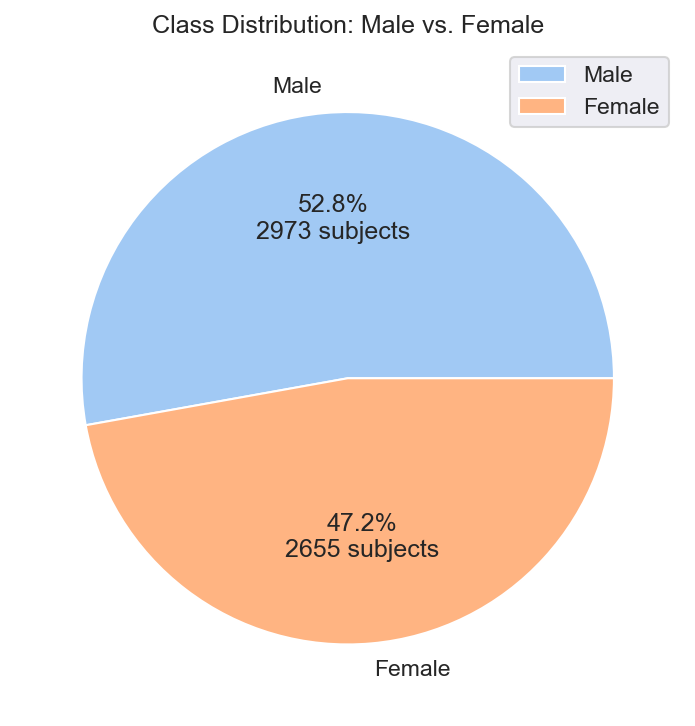

In [27]:
num_participants = len(baseline_c_stop_go["src_subject_id"].unique())
print("Total number of participants: ", num_participants)

maledf = baseline_c_stop_go.loc[baseline_c_stop_go["demo_sex_v2"] == 0]
femaledf = baseline_c_stop_go.loc[baseline_c_stop_go["demo_sex_v2"] == 1]

male_count = baseline_c_stop_go.loc[baseline_c_stop_go["demo_sex_v2"] == 0]["src_subject_id"].count()
female_count = baseline_c_stop_go.loc[baseline_c_stop_go["demo_sex_v2"] == 1]["src_subject_id"].count()
print("Total number of males: ", male_count)
print("Total number of females: ", female_count)

def pie_fmt(x):
        return '{:.1f}%\n{:.0f} subjects'.format(x, num_participants*x/100)

def male_female_piechart():    
    
    
    colors = sns.color_palette("pastel")
    fig, ax = plt.subplots(dpi=150)
    ax.pie([male_count, female_count], labels=["Male", "Female"], colors=colors, autopct=pie_fmt)
    ax.set_title("Class Distribution: Male vs. Female")
    ax.legend()
    plt.savefig(figures/"classdistribution.jpg")
    plt.show()

male_female_piechart()

#### Age distribution

In [28]:
from scipy.stats import mannwhitneyu # Mann-Whitney U-test

U1, p = mannwhitneyu(maledf["interview_age"], femaledf["interview_age"])

print("Null hypothesis: the age distribution between the genders is equal.")
print(f'Mann-Whitney U-test p-value: {p:.4f}')
if (p < 0.05):
    print("reject")

Null hypothesis: the age distribution between the genders is equal.
Mann-Whitney U-test p-value: 0.0001
reject


Age difference baseline p-value: 0.00012466936630320605
Age difference followup p-value: 0.00010808561995417082
-> Baseline age difference
-> Followup age difference


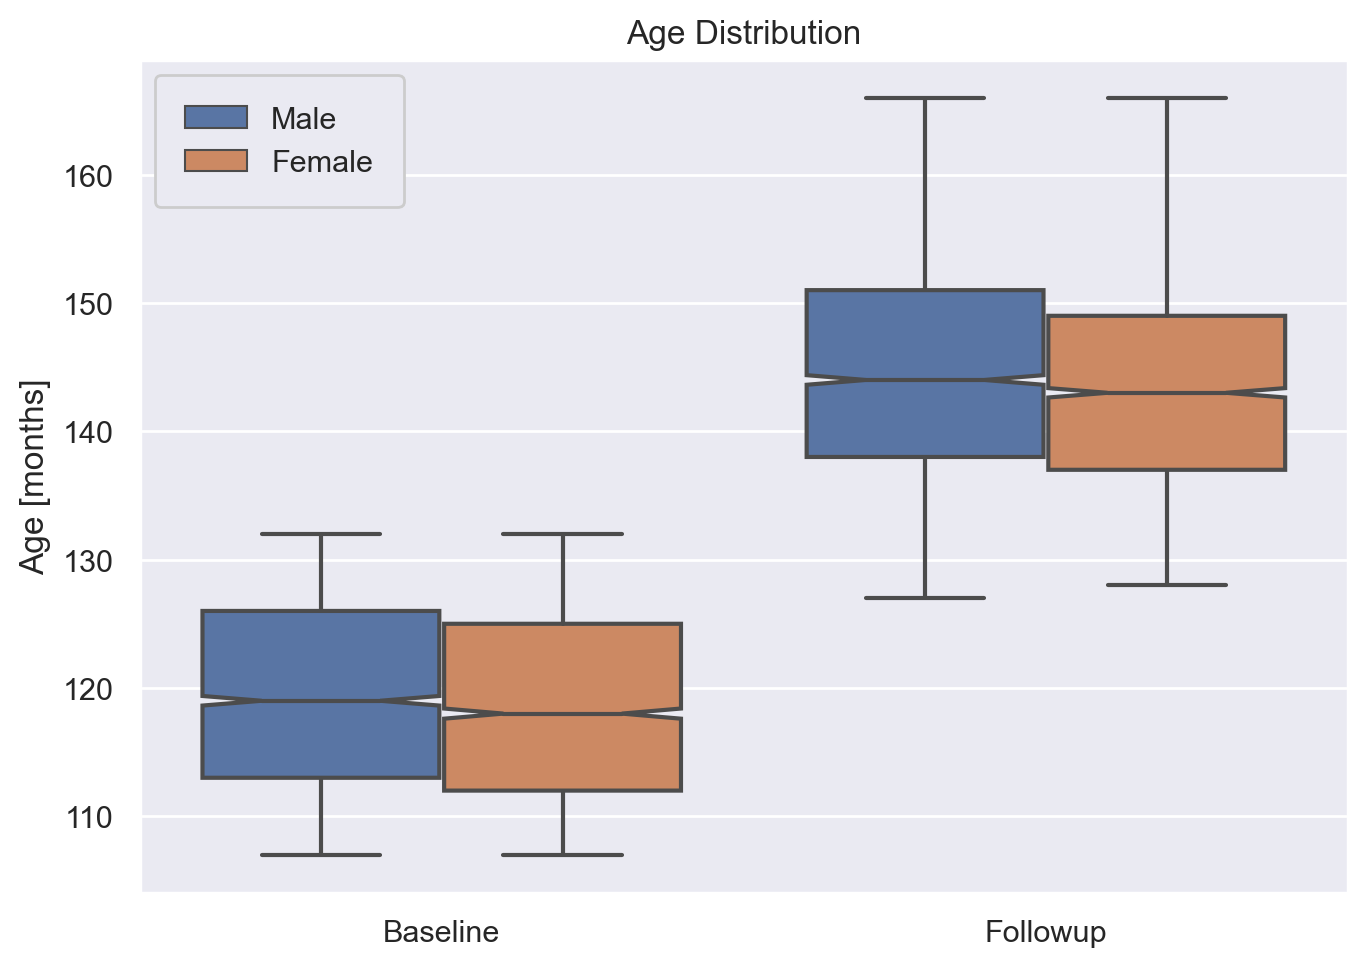

In [29]:
all_c_age_b = baseline_c_stop_go[["src_subject_id", "interview_age", "demo_sex_v2"]]
all_c_age_b = all_c_age_b.assign(eventname="Baseline")
all_c_age_f = followup_c_stop_go[["src_subject_id", "interview_age", "demo_sex_v2"]]
all_c_age_f = all_c_age_f.assign(eventname="Followup")
all_c_age = pd.concat([all_c_age_b, all_c_age_f])
all_c_age = all_c_age.replace({0: "Male", 1: "Female"})

baseline_male_ages = all_c_age_b[all_c_age_b["demo_sex_v2"] == 0]["interview_age"]
baseline_female_ages = all_c_age_b[all_c_age_b["demo_sex_v2"] == 1]["interview_age"]

followup_male_ages = all_c_age_f[all_c_age_f["demo_sex_v2"] == 0]["interview_age"]
followup_female_ages = all_c_age_f[all_c_age_f["demo_sex_v2"] == 1]["interview_age"]

U1, p_baseline = mannwhitneyu(baseline_male_ages, baseline_female_ages)
U1, p_followup = mannwhitneyu(followup_male_ages, followup_female_ages)

print(f"Age difference baseline p-value: {p_baseline}")
print(f"Age difference followup p-value: {p_followup}")

if (p_baseline < 0.05):
    print("-> Baseline age difference")
if (p_followup < 0.05):
    print("-> Followup age difference")

def age_distribution_plot():
    # Plotting
    fig, ax = plt.subplots(dpi=200)
    b = sns.boxplot(data=all_c_age,  x="eventname", y='interview_age', hue="demo_sex_v2", ax=ax, notch=True)
    ax.legend(fancybox=True, framealpha=1, borderpad=1)
    ax.set_ylabel("Age [months]")
    ax.set_xlabel("")
    plt.title('Age Distribution')
    plt.savefig(figures/"ageboxplot.jpg")
    plt.show()
    
age_distribution_plot()

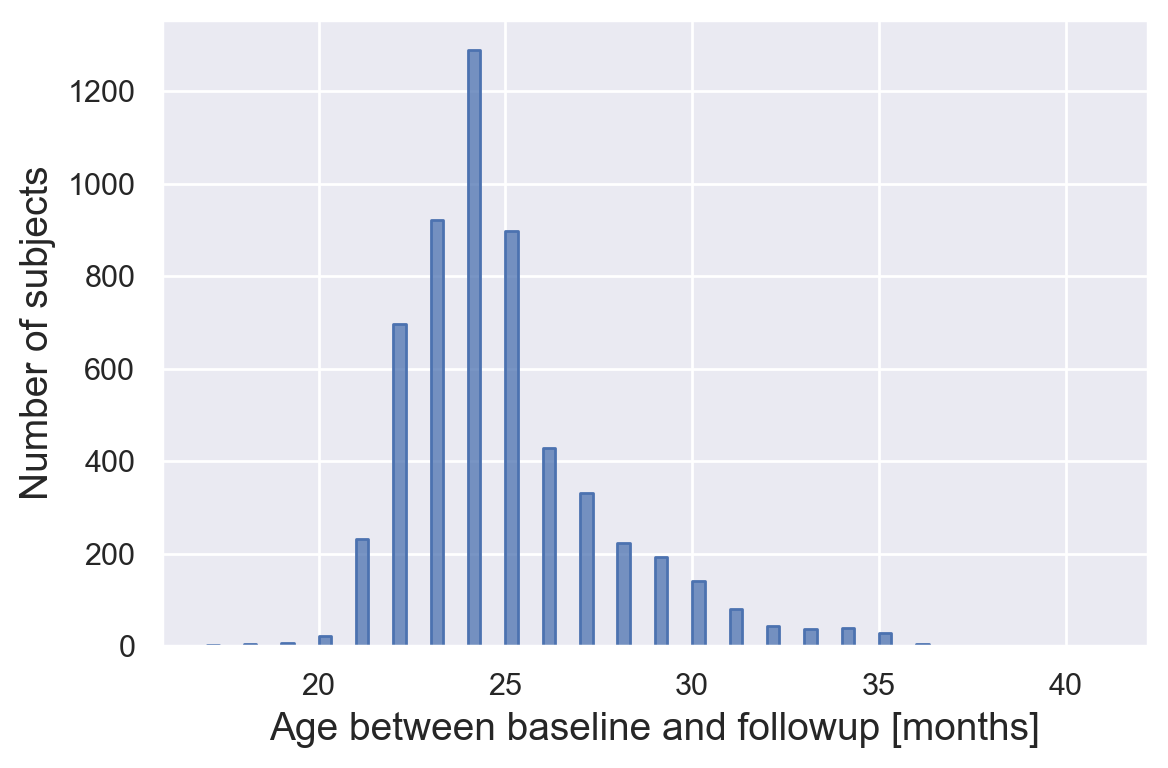

In [30]:
diff = followup_c_stop_go["interview_age"] - baseline_c_stop_go["interview_age"]
diff = baseline_c_stop_go[["src_subject_id", "interview_age"]]
diff = diff.merge(followup_c_stop_go[["src_subject_id", "interview_age"]], on=["src_subject_id"])
diff["diff"] = diff["interview_age_y"] - diff["interview_age_x"]

def age_difference_histogram():
    fig, ax = plt.subplots(dpi=200, figsize=(6,4))
    sns.histplot(diff, x="diff", element="step", ax=ax)
    ax.set_xlabel("Age between baseline and followup [months]", fontsize=14)
    ax.set_ylabel("Number of subjects", fontsize=14)
    plt.tight_layout()
    plt.savefig(figures/"agediffplot.jpg")
    plt.show()

age_difference_histogram()

### Site locations

In [57]:
baseline_c_stop_go["site_id_l"].value_counts()

site_id_l
site16    607
site04    466
site20    399
site10    366
site13    325
site14    324
site12    311
site02    304
site17    288
site06    271
site21    260
site03    224
site11    216
site19    208
site18    195
site05    185
site09    153
site01    146
site07    145
site15    144
site08     90
site22      7
Name: count, dtype: int64

### Race

In [67]:
# WHITE
baseline_c_stop_go["demo_race_a_p___10"].value_counts()

demo_race_a_p___10
1.0    4427
0.0    1199
Name: count, dtype: int64

In [68]:
# BLACK/AFRICAN AMERICAN
baseline_c_stop_go["demo_race_a_p___11"].value_counts()

demo_race_a_p___11
0.0    4598
1.0    1028
Name: count, dtype: int64

In [69]:
(4427 + 1028) / len(baseline_c_stop_go)

0.96822861199858

In [70]:
# these two classes accounts for 97% of the variation of race.

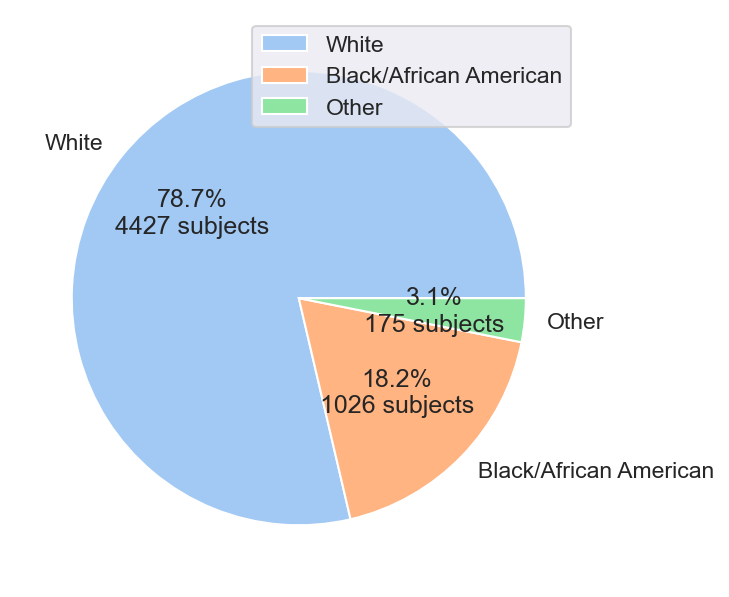

In [34]:
racecounts = [4427, 1026, len(baseline_c_stop_go) - 4427 - 1026]

def pie_fmt(x):
        return '{:.1f}%\n{:.0f} subjects'.format(x, len(baseline_c_stop_go)*x/100)

colors = sns.color_palette("pastel")
fig, ax = plt.subplots(dpi=150, figsize=(5,5))
ax.pie(racecounts, labels=["White", "Black/African American", "Other"], colors=colors, autopct=pie_fmt)
ax.legend(loc="upper right")
plt.tight_layout()
plt.savefig(figures/"race_dist.jpg")
plt.show()

### Headsize

In [17]:
from scipy.stats import mannwhitneyu # Mann-Whitney U-test

cstop = pd.read_csv("../data/interim/dev_c_stop_df.csv")
mri = pd.read_csv("../data/interim/dev_mri_df.csv")

mri_male = mri.iloc[cstop[cstop["demo_sex_v2"] == 0].index]
mri_female = mri.iloc[cstop[cstop["demo_sex_v2"] == 1].index]

U1, p = mannwhitneyu(mri_male["smri_vol_scs_suprateialv"], mri_female["smri_vol_scs_suprateialv"])

print("Null hypothesis: skull size between the genders is equal.")
print(f'Mann-Whitney U-test p-value: {p:.10f}')
if (p < 0.05):
    print("reject")

Null hypothesis: skull size between the genders is equal.
Mann-Whitney U-test p-value: 0.0000000000
reject


#### Interactive histogram plots

In [8]:
def histogram(variable):
    fig, ax = plt.subplots(dpi=200, figsize=(6,4))
    sns.histplot(baseline_c_stop_go, x=variable, hue="demo_sex_v2", element="step", ax=ax)
    ax.set_xlabel(variable, fontsize=14)
    ax.set_ylabel("Number of subjects", fontsize=14)
    plt.tight_layout()
    plt.show()


features = [c for c in baseline_c_stop_go.columns if c not in ["src_subject_id", "eventname"]]
interact(histogram, variable=features, value="")

interactive(children=(Dropdown(description='variable', options=('tfsstabwdp_149', 'tfsstabwdp_150', 'tfsstabwd…

<function __main__.histogram(variable)>

### Correlation plots

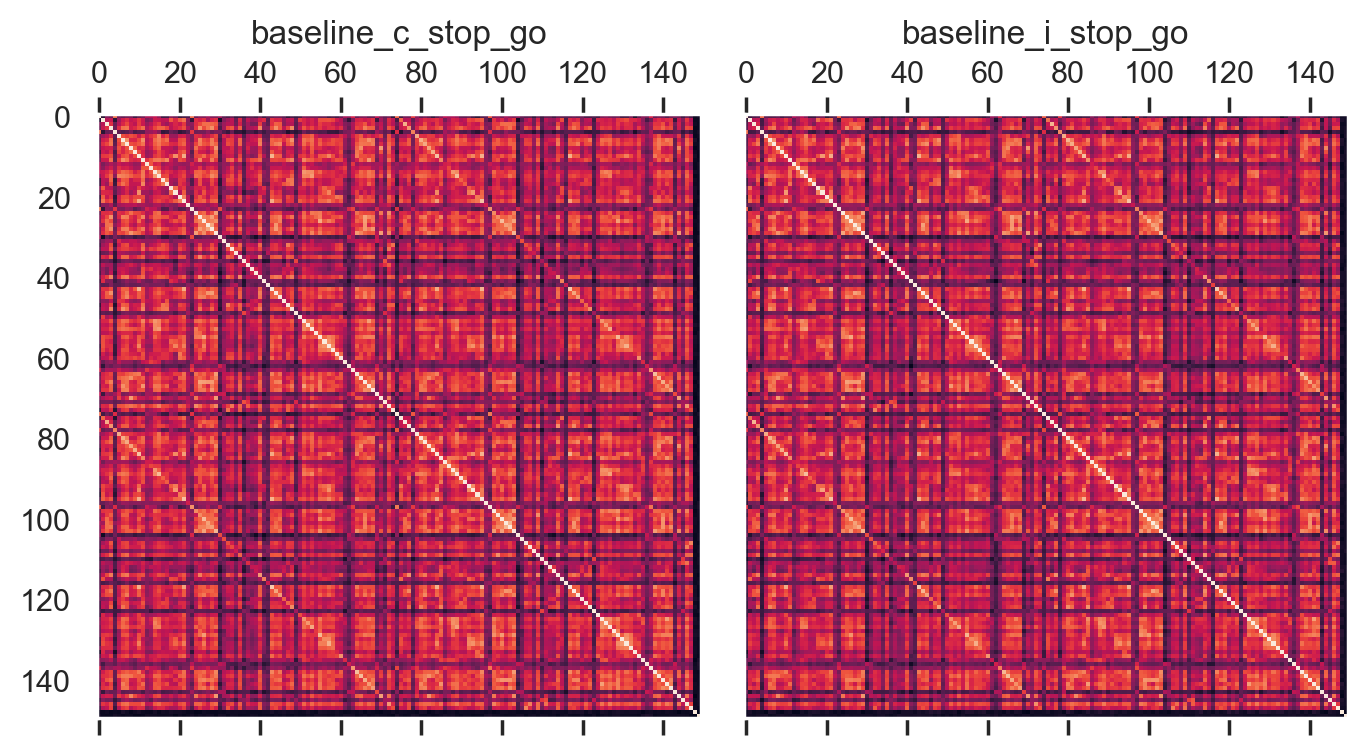

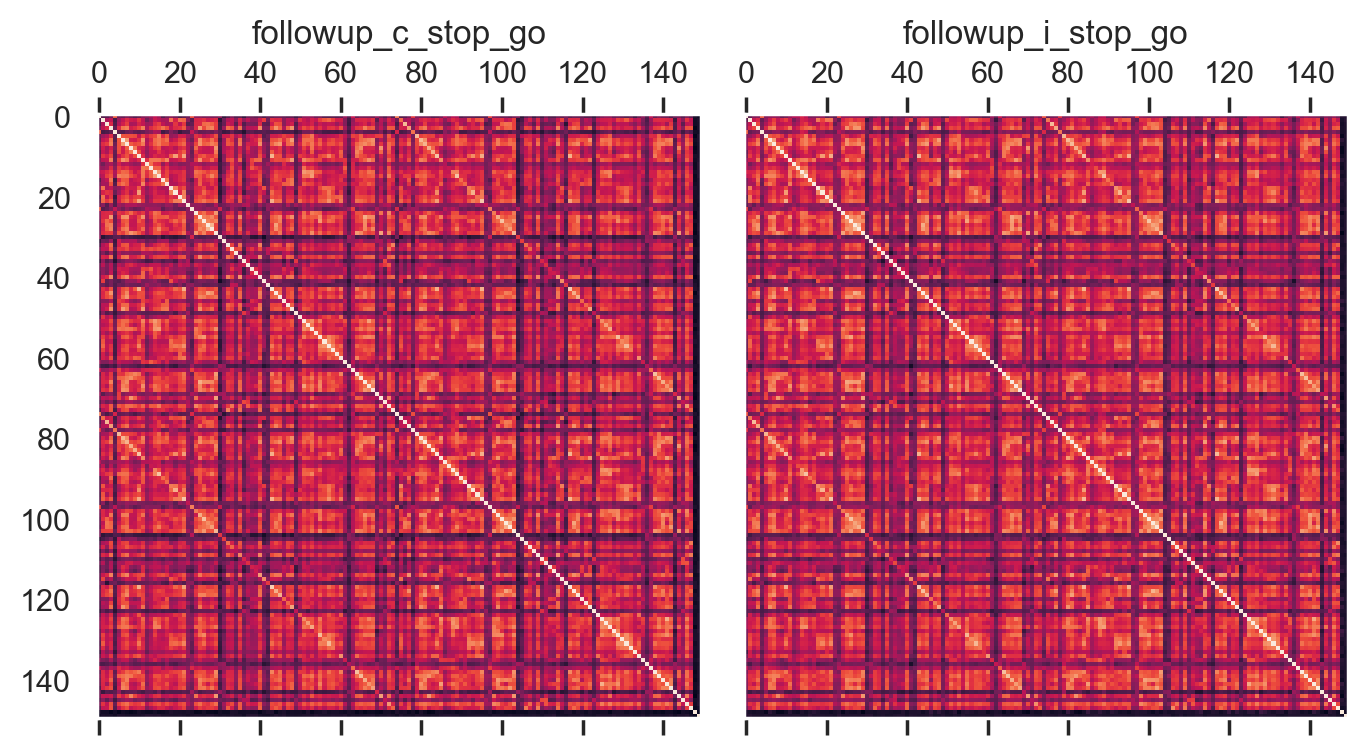

In [130]:
def create_correlation_plot(dfs, titles):
    fig, axs = plt.subplots(nrows=1, ncols=len(dfs), dpi=200, sharey=True, sharex=True)

    for i, ax in enumerate(axs.flat):
        features = [c for c in dfs[i].columns if c not in ["src_subject_id", "eventname"]]
        corr_matrix = dfs[i][features].corr()
        im = ax.matshow(corr_matrix)
        ax.set_title(titles[i])
        ax.grid(None)
        
    plt.tight_layout()
    plt.show()

create_correlation_plot([baseline_c_stop_go, baseline_i_stop_go], ["baseline_c_stop_go", "baseline_i_stop_go"])
create_correlation_plot([followup_c_stop_go, followup_i_stop_go], ["followup_c_stop_go", "followup_i_stop_go"])

### Regression plots

In [122]:
def plot_linear_dependence(feature):
    fig, ax = plt.subplots(figsize=(5,5))
    
    males = baseline_c_stop_go.loc[baseline_c_stop_go["demo_sex_v2"] == 0]
    females = baseline_c_stop_go.loc[baseline_c_stop_go["demo_sex_v2"] == 0]

    sns.regplot(males, x="demo_brthdat_v2", y=feature, ax=ax, scatter=True, label="male")
    sns.regplot(females, x="demo_brthdat_v2", y=feature, ax=ax, scatter=True, label="female")
    
    ax.set_title(f)
    ax.legend()
        
    plt.tight_layout()
    plt.show()

interact(plot_linear_dependence, feature=features, value="tfsstabwdp_149")


interactive(children=(Dropdown(description='feature', options=('tfsstabwdp_149', 'tfsstabwdp_150', 'tfsstabwdp…

<function __main__.plot_linear_dependence(feature)>

## Baseline Models

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, balanced_accuracy_score 
from sklearn import metrics

[Text(1, 0, 'Male'), Text(2, 0, 'Female')]

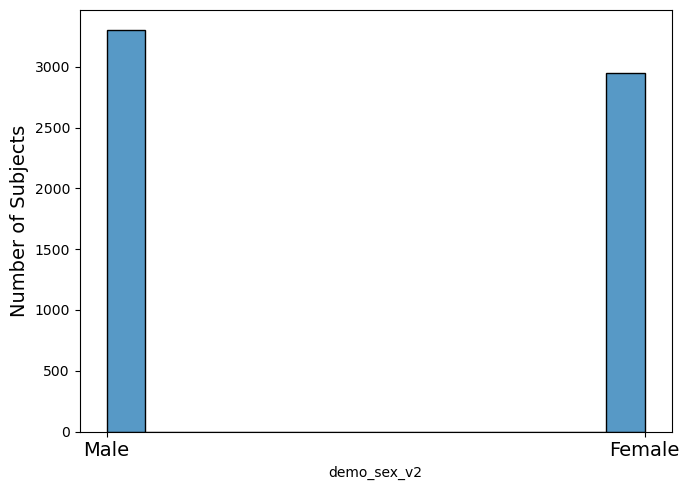

In [20]:
plt.figure()
ax1 = sns.histplot(data=baseline_c_stop_go, x='demo_sex_v2')
ax1.set_ylabel("Number of Subjects", fontsize = 14)
ax1.set_xticks([1, 2])
ax1.set_xticklabels(["Male", "Female"], fontsize = 14)

In [21]:
c_stop_go_features = ["tfsstabwdp_" + str(i) for i in range(149, 297)]
i_stop_go_features = ["tfsstabwdp_" + str(i) for i in range(297, 444 + 1)]

In [34]:
X = baseline_c_stop_go[c_stop_go_features]
Y = baseline_c_stop_go["demo_sex_v2"]

Y = Y.replace({1: 0, 2: 1})

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=3)

# For reproducibility we want to set the seed, it's the only fair way to compare classifiers
np.random.seed(seed=3)
    
# Define Random Forest classifier
model_1 = RandomForestClassifier(max_depth=3, n_estimators=200, random_state=3)

# Fit classifier using the training set and labels
model_1.fit(X_train, Y_train)
print('Random Forest has been trained!')

# Get the predictions of trained model on the test set
Y_pred_model_1 = model_1.predict(X_test)

Random Forest has been trained!


In [37]:
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_model_1, pos_label=1)
auc_model_1 = metrics.auc(fpr, tpr)
print("Area under the curve: {:.3f}".format(auc_model_1))

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred_model_1)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate balanced accuracy
b_accuracy = balanced_accuracy_score(Y_test, Y_pred_model_1)
print("Balanced Accuracy: {:.2f}%".format(b_accuracy * 100))

Area under the curve: 0.543
Accuracy: 57.74%
Balanced Accuracy: 54.31%


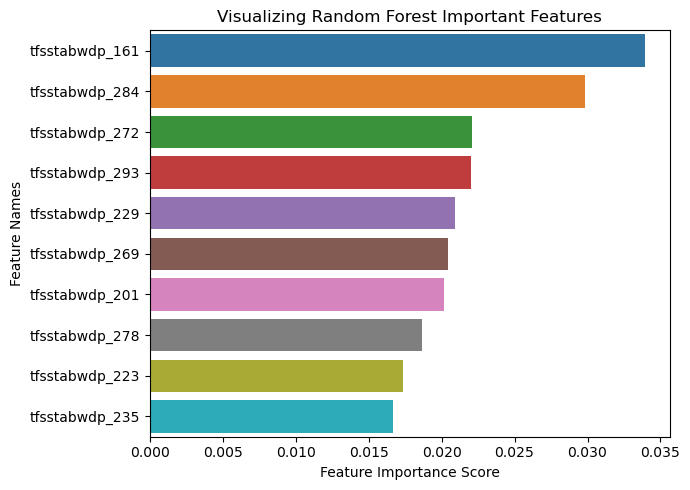

In [38]:
feature_names = X.columns
feature_imp = pd.Series(model_1.feature_importances_,index=feature_names.values).sort_values(ascending=False)

# Create a bar plot
sns.barplot(x=feature_imp[0:10], y=feature_imp.index[0:10])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature Names')
plt.title("Visualizing Random Forest Important Features")
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)

print('KNN Classifier has been trained!')

# Get the predictions of trained model on the test set
Y_pred_neigh = neigh.predict(X_test)

# KNN Evaluation

# Area Under the curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_neigh, pos_label=1)
auc_neigh = metrics.auc(fpr, tpr)
print("Area under the curve: {:.3f}".format(auc_neigh))

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred_neigh)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate balanced accuracy
b_accuracy = balanced_accuracy_score(Y_test, Y_pred_neigh)
print("Balanced Accuracy: {:.2f}%".format(b_accuracy * 100))

KNN Classifier has been trained!
Area under the curve: 0.517
Accuracy: 52.37%
Balanced Accuracy: 51.75%


In [41]:
model_2 = MLPClassifier(random_state=3, max_iter=800,verbose=True, hidden_layer_sizes=(128,64,32,16))
model_2.fit(X_train, Y_train)

print('Multi-layer perceptron has been trained!')

Y_pred_model_2 = model_2.predict(X_test)

Iteration 1, loss = 0.70259882
Iteration 2, loss = 0.68754858
Iteration 3, loss = 0.68088550
Iteration 4, loss = 0.67402452
Iteration 5, loss = 0.66440872
Iteration 6, loss = 0.65159224
Iteration 7, loss = 0.63483231
Iteration 8, loss = 0.61421828
Iteration 9, loss = 0.59602034
Iteration 10, loss = 0.57574302
Iteration 11, loss = 0.54354335
Iteration 12, loss = 0.52341967
Iteration 13, loss = 0.49439765
Iteration 14, loss = 0.46921460
Iteration 15, loss = 0.45331705
Iteration 16, loss = 0.42676535
Iteration 17, loss = 0.39603704
Iteration 18, loss = 0.37641660
Iteration 19, loss = 0.35423863
Iteration 20, loss = 0.32234030
Iteration 21, loss = 0.31524979
Iteration 22, loss = 0.28122593
Iteration 23, loss = 0.24587123
Iteration 24, loss = 0.23118632
Iteration 25, loss = 0.22459910
Iteration 26, loss = 0.21027342
Iteration 27, loss = 0.19500637
Iteration 28, loss = 0.17439901
Iteration 29, loss = 0.15263022
Iteration 30, loss = 0.14351308
Iteration 31, loss = 0.12273485
Iteration 32, los

In [42]:
# Calculate area under the curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_model_2, pos_label=1)
auc_model_2 = metrics.auc(fpr, tpr)
print("Area under the curve: {:.3f}".format(auc_model_2))

# Calculate the accuracy score
accuracy = accuracy_score(Y_test, Y_pred_model_2)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# Calculate balanced accuracy
b_accuracy = balanced_accuracy_score(Y_test, Y_pred_model_2)
print("Balanced Accuracy: {:.2f}%".format(b_accuracy * 100))

# How can we compare the two classifiers?

Area under the curve: 0.549
Accuracy: 54.86%
Balanced Accuracy: 54.94%


In [43]:
X.corr()

tfsstabwdp_149  tfsstabwdp_150  tfsstabwdp_151  \
tfsstabwdp_149        1.000000        0.089090        0.298584   
tfsstabwdp_150        0.089090        1.000000        0.446983   
tfsstabwdp_151        0.298584        0.446983        1.000000   
tfsstabwdp_152        0.259960        0.476196        0.552771   
tfsstabwdp_153        0.680408        0.082952        0.227849   
...                        ...             ...             ...   
tfsstabwdp_292        0.286524        0.116585        0.253348   
tfsstabwdp_293        0.261454        0.478092        0.500402   
tfsstabwdp_294        0.150960        0.307626        0.274763   
tfsstabwdp_295        0.250350        0.568573        0.526975   
tfsstabwdp_296        0.163536        0.425482        0.476602   

                tfsstabwdp_152  tfsstabwdp_153  tfsstabwdp_154  \
tfsstabwdp_149        0.259960        0.680408        0.276289   
tfsstabwdp_150        0.476196        0.082952        0.375426   
tfsstabwdp_151        0.552771        0.227849        0.433733   
tfsstabwdp_152        1.000000        0.242054        0.540713   
tfsstabwdp_153        0.242054        1.000000        0.213560   
...                        ...             ...             ...   
tfsstabwdp_292        0.222422        0.226632        0.365737   
tfsstabwdp_293        0.490908        0.248534        0.569046   
tfsstabwdp_294        0.275513        0.104425        0.193557   
tfsstabwdp_295        0.604942        0.191488        0.561629   
tfsstabwdp_296        0.587433        0.111732        0.419656   

                tfsstabwdp_155  tfsstabwdp_156  tfsstabwdp_157  \
tfsstabwdp_149        0.238219        0.267322        0.274686   
tfsstabwdp_150        0.499051        0.546766        0.467022   
tfsstabwdp_151        0.533139        0.613471        0.494041   
tfsstabwdp_152        0.694829        0.707087        0.499642   
tfsstabwdp_153        0.183730        0.214724        0.275895   
...                        ...             ...             ...   
tfsstabwdp_292        0.204977        0.226665        0.249569   
tfsstabwdp_293        0.504409        0.587269        0.742205   
tfsstabwdp_294        0.329479        0.380551        0.315838   
tfsstabwdp_295        0.678227        0.694135        0.613077   
tfsstabwdp_296        0.561105        0.598628        0.435369   

                tfsstabwdp_158  ...  tfsstabwdp_287  tfsstabwdp_288  \
tfsstabwdp_149        0.149496  ...        0.240315        0.279430   
tfsstabwdp_150        0.491468  ...        0.503454        0.549843   
tfsstabwdp_151        0.454126  ...        0.558364        0.555761   
tfsstabwdp_152        0.542680  ...        0.592766        0.586610   
tfsstabwdp_153        0.167390  ...        0.227694        0.224941   
...                        ...  ...             ...             ...   
tfsstabwdp_292        0.232962  ...        0.278918        0.288985   
tfsstabwdp_293        0.611933  ...        0.663463        0.681774   
tfsstabwdp_294        0.264829  ...        0.241041        0.399435   
tfsstabwdp_295        0.607617  ...        0.662276        0.711996   
tfsstabwdp_296        0.496353  ...        0.506992        0.535960   

                tfsstabwdp_289  tfsstabwdp_290  tfsstabwdp_291  \
tfsstabwdp_149        0.259279        0.199628        0.265189   
tfsstabwdp_150        0.503815        0.533301        0.555179   
tfsstabwdp_151        0.622945        0.469815        0.579531   
tfsstabwdp_152        0.664943        0.587469        0.617219   
tfsstabwdp_153        0.207551        0.142267        0.179853   
...                        ...             ...             ...   
tfsstabwdp_292        0.261960        0.147183        0.223285   
tfsstabwdp_293        0.511346        0.490470        0.525318   
tfsstabwdp_294        0.280960        0.356701        0.364441   
tfsstabwdp_295        0.597112        0.716620        0.663374   
tfsstabwdp_296        0.523700        0.534845        0.55

/Users/alice/miniforge3/envs/pydata-book/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


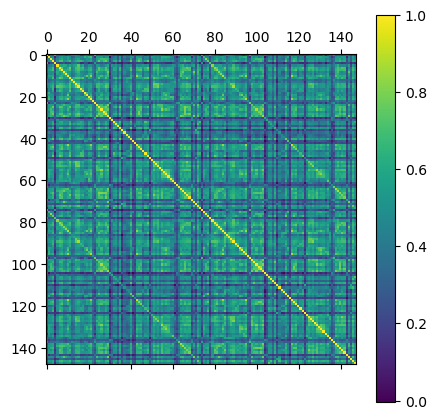

In [44]:
plt.matshow(X.corr())
cb = plt.colorbar()
plt.show()